<a href="https://colab.research.google.com/github/Panteli280/.../blob/Panteli280-patch-1/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%A7%D0%B8%D1%81%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D0%B5_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9E%D0%94%D0%A3%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Численное решение обыкновенных дифференциальных уравнений

## Обыкновенные дифференциальные уравнения

*Дифференцильные уравнения* - это математический аппарат, используемый для описания поведения динамических систем в различных предметных областях. Динамическая система имеет состояние, описываемое набором переменных и изменяющееся со временем. 

В качестве неизвестного в дифференциальном уравнении выступает некоторая функция. Кроме того, в дифференциальное уравнение входят производные неизвестной функции, свободная переменная и различные параметры.

*Обыкновенное дифференциальное уравнение (ОДУ)* - это дифференциальное уравнение для функции от одной переменной:

\begin{equation}
  F(x, y(x), y', y'', \ldots, y^{(n)}) = 0
\end{equation}

Зачастую ОДУ записывают в форме уравнения, разрешённого относительно старшей производной:

\begin{equation}
  y^{(n)} = f(x, y(x), y', y'', \ldots, y^{(n - 1)})
\end{equation}

ОДУ 1-го порядка:

\begin{equation}
  F(x, y, y') = 0 \\
  y' = f(x, y)
\end{equation}

В общем случае, ОДУ имеет бесконечное множество решений. Для ОДУ 1-го порядка общее решение зависит от одной произвольной постоянной:

\begin{equation}
  y = \phi(x, C)
\end{equation}

Если постоянной придать определенное значение $C = C_0$, то получаем частное решение:

\begin{equation}
  y = \phi(x, C_0)
\end{equation}

Для нахождения $C_0$ и соответсвенно частного решения ОДУ используются начальные условия:

\begin{equation}
  y(x_0) = y_0
\end{equation}

ОДУ вместе с начальными условиями образуют задачу Коши:

\begin{equation}
  y' = f(x, y), \quad y(x_0) = y_0
\end{equation}

## Метод Эйлера

Метод Эйлера (метод конечных разностей) заключается в том, что на области определения функции $y(x)$ вводится равномерная сетка с шагом $h$:

\begin{equation}
  x_i = x_0 + i h
\end{equation}

По определению производной:

\begin{equation}
  y'(x_i) = \frac{dy}{dx} = \lim_{\Delta x \rightarrow 0}\frac{y(x_i + \Delta x)-y(x_i)}{\Delta x} \approx \frac{y(x_i + h)-y(x_i)}{h} = \frac{y_{i+1}-y_i}{h}
\end{equation}

По условию задачи Коши:
\begin{equation}
  y'(x_i) = f(x_i, y_i) = f_i
\end{equation}

Тогда:

\begin{equation}
  \frac{y_{i+1}-y_i}{h} = f_i
\end{equation}

Отсюда получаем формулу *явного метода Эйлера*:

\begin{equation}
  y_{i+1} = y_i + h f_i
\end{equation}

Используя другие приближения для производной функции получаем:
* *неявный метод Эйлера (левые разности)*:

\begin{equation}
  \frac{y_{i}-y_{i-1}}{h} = f_i
\end{equation}

* *центральные разности*:

\begin{equation}
  \frac{y_{i+1}-y_{i-1}}{h} = f_i, \quad i = 1,2,\dots,n-1 \\
  y_1 = y_0 + h f_0
\end{equation}

In [ ]:
import numpy as np

def df(x, y):
    """
    2 <= x <= 3
    y(2) = 4
    h = 0.1
    y' = (2xy - y^2) / x^2
    :return:
    """
    return (2 * x * y - (y * y)) / (x * x)
    pass

x0 = 2  

xn = 3

y0 = 4

h = 0.1

In [ ]:
def euler(f, x_0, x_n, y_0, h):
    x_h = x_0 + h
    l_size = int((x_n - x_0) / h)
    x_list = np.linspace(x_0, x_n, l_size + 1)
    y_list = np.zeros(l_size + 1)
    y_list[0] = y_0

    for i in range(1, len(y_list)):
        y_list[i] = y_list[i - 1] + h * f(x_list[i - 1], y_list[i - 1])
        x_h += h

    return x_list, y_list
    pass

Проверьте работу метода Эйлера для функции из варианта

In [ ]:
x_euler, y_euler = euler(df, x0, xn, y0, h)
x_euler, y_euler

(array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 array([4.        , 4.        , 4.01814059, 4.04984234, 4.09196052,
        4.14226034, 4.19910804, 4.26128043, 4.32784289, 4.3980686 ,
        4.47138359]))

## Методы Рунге-Кутта

Суть методов - функция $y(x)$ раскладывается в ряд Тейлора в точке $x_i$ и в качестве приближенного значения используются первые $n$ слагаемых ряда. $n$ - порядок метода Рунге-Кутта.

Можно показать, что метод Эйлера является методом из семества Рунге-Кутта 2 порядка.

Другие модификации метода Эйлера, являющиеся методами Рунге-Кутта 2 порядка:
* *модифицированный метод Эйлера*:
\begin{equation}
  \frac{y_{i+1}-y_{i}}{h} = f(x_i + \frac{h}{2}, y_i + \frac{h}{2}  f_i)
\end{equation}
* *метод Эйлера с пересчетом*:
\begin{equation}
  \frac{y_{i+1}-y_{i}}{h} = \frac{1}{2}(f_i + f(x_{i + 1}, y_i +  h f_i))
\end{equation}

На практике распространен *метод Рунге-Кутта четвертого порядка*:

\begin{equation}
  y_{i + 1} = y_i = \frac{h}{6}(k_0 + 2 k_1 + 2 k_2 + k_3), i = 0,1,\dots \\
  k_0 = f_i \\ 
  k_1 = f(x_i + \frac{h}{2}, y_i + \frac{h}{2} k_0) \\
  k_2 = f(x_i + \frac{h}{2}, y_i + \frac{h}{2} k_1) \\
  k_3 = f(x_i + h, y_i + h k_2)
\end{equation}


In [ ]:
def euler_mod(f, x_0, x_n, y_0, h):
    x_h = x_0 + h
    l_size = int((x_n - x_0) / h)
    x_list = np.linspace(x_0, x_n, l_size + 1)
    y_list = np.zeros(l_size + 1)
    y_list[0] = y_0

    for i in range(1, len(y_list)):
        p = f(x_list[i - 1] + h/2, y_list[i - 1] + (h * f(x_list[i], y_list[i]))/2)
        y_list[i] = h * p + y_list[i - 1]

    return x_list, y_list
    pass

In [ ]:
def euler_recount(f, x_0, x_n, y_0, h):
    x_h = x_0 + h
    l_size = int((x_n - x_0) / h)
    x_list = np.linspace(x_0, x_n, l_size + 1)
    y_list = np.zeros(l_size + 1)
    y_list[0] = y_0

    for i in range(1, len(y_list)):
        fi = f(x_list[i - 1], y_list[i - 1])
        q = f(x_list[i], y_list[i - 1] + h * fi)
        y_list[i] = 0.5 * (fi + q) * h + y_list[i - 1]

    return x_list, y_list
    pass

In [ ]:
def rk4(f, x_0, x_n, y_0, h):
    x_h = x_0 + h
    l_size = int((x_n - x_0) / h)
    x_list = np.linspace(x_0, x_n, l_size + 1)
    y_list = np.zeros(l_size + 1)
    y_list[0] = y_0

    for i in range(1, len(y_list)):
        k0 = f(x_list[i], y_list[i])
        k1 = f(x_list[i - 1] + h/2, y_list[i - 1] + (h/2) * k0)
        k2 = f(x_list[i - 1] + h/2, y_list[i - 1] + (h/2) * k1)
        k3 = f(x_list[i - 1] + h, y_list[i - 1] + h * k2)
        y_list[i] = (h/6) * (k0 + 2*k1 + 2*k2 + k3) + y_list[i - 1]

    return x_list, y_list

Постройте интегральные кривые для функции из варианта, выполнив вычисления с помощью метода Эйлера, модифицированного метода Эйлера, метода Эйлера с пересчетом и метода Рунге-Кутта 4 порядка. Сравните результаты работы этих методов

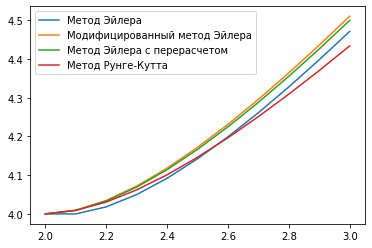

In [ ]:
import matplotlib.pyplot as plt

x_euler, y_euler = euler(df, x0, xn, y0, h)
x_mod, y_mod = euler_mod(df, x0, xn, y0, h)
x_recount, y_recount = euler_recount(df, x0, xn, y0, h)
x_rk4, y_rk4 = rk4(df, x0, xn, y0, h)

plt.plot(x_euler, y_euler, label='Метод Эйлера')
plt.plot(x_mod, y_mod, label='Модифицированный метод Эйлера')
plt.plot(x_recount, y_recount, label='Метод Эйлера с перерасчетом')
plt.plot(x_rk4, y_rk4, label='Метод Рунге-Кутта')
plt.legend()
plt.show()